In [ ]:
### For colab, run the following codes
# from google.colab import drive
# drive.mount('/content/gdrive')

### cd to your directory
# %cd /content/gdrive/MyDrive/Your_Dir

### cd to rotate-yolov5
# %cd rotate-yolov5

### install requirements
# !pip install -r requirements.txt

### install cuda extensions for polygon box iou computation
# %cd utils/iou_cuda
# !python setup.py install

### cd back
# %cd ..
# %cd ..

# 1. Inference

    rotate_detect.py` runs rotate-enabled YOLOv5 inference on a variety of sources, and saving results to `runs/detect`.

In [1]:
from IPython.display import Image

!python rotate_detect.py --weights rotate-yolov5s-ucas.pt --img 1024 --conf 0.75 \
    --source data/images/UCAS-AOD --iou-thres 0.4 --hide-labels
# Image(filename='runs/detect/exp/1070.png', width=1024)

Notice: rotate_detect.py is designed for rotate cases
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.75, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=True, imgsz=1024, iou_thres=0.4, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/UCAS-AOD', update=False, view_img=False, weights=['rotate-yolov5s-ucas.pt'])
YOLOv5 🚀 2021-6-11 torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Fusing layers... 
/home/xinzeli831/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layer

# 2. Test
Test the rotate model's accuracy on a subset of [UCAS-AOD] dataset (). To show results by class use the `--verbose` flag.

In [2]:
# Run Rotate_Yolov5s on a subset of UCAS-AOD
!python rotate_test.py --weights rotate-yolov5s-ucas.pt --data rotate_ucas.yaml --img 1024 --iou 0.65 --task val

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/rotate_ucas.yaml', device='', exist_ok=False, half=False, imgsz=1024, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['rotate-yolov5s-ucas.pt'])
YOLOv5 🚀 2021-6-11 torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Fusing layers... 
/home/xinzeli831/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7078183 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning '../UCAS50/val.cache' images and labels... 10 found, 0 mi

# 3. Train

Train a rotate-YOLOv5s model on [UCAS-AOD train]() with `--data rotate_ucas.yaml`, starting from pretrained `--weights rotate-yolov5s-ucas.pt`, or from randomly initialized `--weights '' --cfg rotate_yolov5s_ucas`.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

## 3.1 Autoanchor
* Run utils.rotate_kmean_anchors to generate **predefined anchors** for your specific datasets with specified image size.

In [3]:
import sys
import os
print(os.getcwd())
sys.path.append(os.getcwd())

from utils.autoanchor import rotate_kmean_anchors

nl = 3 # number of anchor layers
na = 5 # number of anchors
img_size = 1024 # image size for training and testing

datacfg = "data/rotate_ucas.yaml"
anchors = rotate_kmean_anchors(datacfg, n=nl*na, gen=3000, img_size=img_size, thr=6.)
print(anchors.reshape(nl, na*2).astype(int))
print('\nPlease Copy the anchors to your model configuration rotate_yolov5*.yaml')

/home/xinzeli831/PolygonObjectDetection/new/rotate-yolov5


Scanning '../UCAS50/train.cache' images and labels... 38 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 38/38 [00:00<?, ?it/s]
autoanchor: Evolving anchors with Genetic Algorithm::   0%|          | 0/3000 [00:00<?, ?it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8799:   5%|▍         | 148/3000 [00:00<00:01, 1479.18it/s]

autoanchor: Running kmeans for 15 anchors on 344 points...
autoanchor: thr=0.17: 1.0000 best possible recall, 14.38 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.879-mean/best, past_thr=0.488-mean: 26,22,  20,39,  45,19,  32,33,  23,57,  39,43,  67,28,  49,40,  58,56,  88,59,  75,74,  99,77,  103,99,  146,81,  155,139
autoanchor: thr=0.17: 1.0000 best possible recall, 14.38 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.879-mean/best, past_thr=0.488-mean: 26,22,  20,39,  45,19,  32,33,  23,57,  39,43,  67,28,  49,40,  58,56,  88,59,  75,74,  99,77,  103,99,  146,81,  154,139
autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.879-mean/best, past_thr=0.488-mean: 26,22,  20,39,  45,19,  32,33,  23,57,  39,43,  67,28,  49,40,  58,56,  88,59,  75,74,  99,78,  103,99,  146,81,  154,139
autoanchor: thr=0.17: 1.0000 best possible recall, 14.38 anchors past thr
autoanchor: n=1


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8804:  11%|█▏        | 343/3000 [00:00<00:01, 1593.12it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8808:  18%|█▊        | 527/3000 [00:00<00:01, 1659.03it/s]

autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.880-mean/best, past_thr=0.487-mean: 24,22,  20,39,  46,18,  33,32,  22,56,  38,42,  63,27,  49,40,  58,55,  87,57,  76,73,  94,79,  100,100,  148,84,  150,140
autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.880-mean/best, past_thr=0.487-mean: 24,22,  20,39,  46,18,  33,32,  22,56,  38,42,  63,27,  49,40,  58,55,  87,57,  76,73,  93,79,  100,100,  148,84,  150,141
autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.880-mean/best, past_thr=0.487-mean: 24,22,  20,39,  46,18,  33,32,  22,56,  38,42,  63,27,  49,40,  58,55,  87,57,  76,73,  93,79,  100,100,  148,84,  150,141
autoanchor: thr=0.17: 1.0000 best possible recall, 14.38 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.473/0.880-mean/best, past


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8813:  23%|██▎       | 697/3000 [00:00<00:01, 1655.70it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8818:  29%|██▉       | 874/3000 [00:00<00:01, 1686.79it/s]

33,33,  23,55,  38,41,  63,26,  48,40,  58,56,  85,57,  77,71,  93,77,  100,97,  149,84,  152,146
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.881-mean/best, past_thr=0.490-mean: 24,22,  20,39,  45,18,  33,33,  23,55,  38,42,  63,26,  48,39,  59,55,  85,58,  76,72,  92,77,  100,97,  148,85,  151,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.881-mean/best, past_thr=0.490-mean: 24,22,  20,39,  45,18,  33,33,  23,55,  38,42,  63,26,  48,39,  59,55,  85,58,  76,72,  92,77,  100,97,  148,85,  151,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.38 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.476/0.881-mean/best, past_thr=0.491-mean: 23,22,  20,38,  46,18,  32,33,  24,54,  38,42,  63,26,  48,40,  59,56,  86,59,  75,70,  91,77,  100,96,  146,85,  151,144
autoanchor: thr=0.17: 1.0000 best possible recall,


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8822:  36%|███▌      | 1069/3000 [00:00<00:01, 1756.39it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8823:  42%|████▏     | 1269/3000 [00:00<00:00, 1821.57it/s]

autoanchor: n=15, img_size=1024, metric_all=0.474/0.882-mean/best, past_thr=0.489-mean: 23,22,  20,39,  46,18,  32,32,  23,54,  37,41,  64,25,  46,41,  57,55,  85,61,  74,72,  95,74,  100,95,  145,85,  151,146
autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.882-mean/best, past_thr=0.489-mean: 23,22,  20,39,  46,18,  32,32,  23,54,  38,41,  64,25,  46,41,  57,55,  85,61,  74,71,  95,74,  100,95,  145,85,  152,146
autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.882-mean/best, past_thr=0.489-mean: 23,22,  20,39,  46,18,  32,32,  23,54,  38,41,  64,25,  46,41,  57,55,  85,61,  74,71,  95,74,  100,95,  146,85,  151,146
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.882-mean/best, past_thr=0.489-mean: 23,22,  20,39,  46,18,  32,32,  23,55,  38,41,  64,25,  46,4


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8825:  48%|████▊     | 1447/3000 [00:00<00:00, 1801.18it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8828:  54%|█████▍    | 1620/3000 [00:00<00:00, 1752.74it/s]

autoanchor: n=15, img_size=1024, metric_all=0.474/0.882-mean/best, past_thr=0.489-mean: 23,22,  20,39,  46,18,  32,32,  23,54,  37,40,  64,25,  46,42,  56,55,  85,60,  73,71,  94,75,  99,96,  148,85,  154,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.882-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  38,40,  63,25,  46,42,  56,56,  84,60,  73,71,  93,75,  100,96,  147,84,  152,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  38,40,  63,25,  46,42,  56,56,  83,60,  74,70,  94,76,  100,96,  146,83,  151,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  38,40,  63,25,  46,42


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8829:  61%|██████    | 1829/3000 [00:01<00:00, 1840.05it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8829:  69%|██████▉   | 2067/3000 [00:01<00:00, 1973.88it/s]

autoanchor: thr=0.17: 1.0000 best possible recall, 14.37 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  37,41,  63,25,  46,42,  56,56,  84,60,  74,70,  93,76,  100,96,  146,83,  152,145
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  37,41,  63,25,  46,42,  56,56,  83,60,  74,71,  92,76,  100,96,  146,84,  152,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  37,41,  63,25,  46,42,  56,56,  83,60,  74,71,  92,76,  100,96,  147,83,  152,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_th


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8830:  76%|███████▌  | 2268/3000 [00:01<00:00, 1983.32it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8831:  82%|████████▏ | 2468/3000 [00:01<00:00, 1929.42it/s]

autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  37,40,  63,25,  46,42,  56,56,  83,60,  73,71,  92,76,  100,96,  147,83,  153,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.475/0.883-mean/best, past_thr=0.490-mean: 23,21,  20,39,  46,18,  32,32,  23,55,  37,40,  63,25,  46,42,  56,56,  83,59,  73,71,  92,76,  100,96,  147,83,  153,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.883-mean/best, past_thr=0.489-mean: 23,21,  20,39,  46,18,  32,32,  23,56,  37,41,  63,26,  46,42,  56,56,  83,59,  73,72,  93,76,  100,96,  146,83,  153,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.883-mean/best, past_th


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8832:  89%|████████▉ | 2667/3000 [00:01<00:00, 1944.94it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8833: 100%|██████████| 3000/3000 [00:01<00:00, 1886.33it/s]

autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.883-mean/best, past_thr=0.489-mean: 23,21,  20,39,  46,18,  32,32,  23,56,  38,41,  63,25,  46,41,  56,56,  83,60,  73,71,  93,76,  101,96,  146,83,  153,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.883-mean/best, past_thr=0.489-mean: 23,21,  20,39,  46,18,  32,32,  23,56,  38,41,  63,25,  46,41,  56,56,  83,60,  73,71,  93,76,  100,96,  146,83,  153,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.883-mean/best, past_thr=0.489-mean: 23,21,  20,39,  46,18,  32,32,  23,56,  38,41,  63,25,  46,41,  56,56,  84,60,  73,71,  92,76,  100,96,  146,83,  153,144
autoanchor: thr=0.17: 1.0000 best possible recall, 14.36 anchors past thr
autoanchor: n=15, img_size=1024, metric_all=0.474/0.883-mean/best, past_th

## 3.2 Rotated Dataset with Augmentations
The following augmentation effects for rotated datasets are shown. For details, please view ***datasets.py rotate_random_perspective, Rotate_LoadImagesAndLabels, rotate_load_mosaic***
<br> Notice: for the exemplar training on UCAS-AOD, the mosaic and mixup are not used.
* image HSV-Hue augmentation
* image HSV-Saturation augmentation
* image HSV-Value augmentation
* image rotation
* image translation
* image scale
* image shear
* image perspective
* mage flip up-down
* image flip left-right
* image mosaic
* image mixup

Scanning '../UCAS50/train.cache' images and labels... 38 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 38/38 [00:09<?, ?it/s]
Scanning '../UCAS50/labels/train.cache' images and labels... 38 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 38/38 [00:00<?, ?it/s]

{'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.1, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 30.0, 'translate': 0.1, 'scale': 0.0, 'shear': 5.0, 'perspective': 0.0005, 'flipud': 0.5, 'fliplr': 0.5, 'mosaic': 0.0, 'mixup': 0.0}


Scanning '../UCAS50/labels/train.cache' images and labels... 38 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 38/38 [00:04<?, ?it/s]


(-0.5, 639.5, 639.5, -0.5)

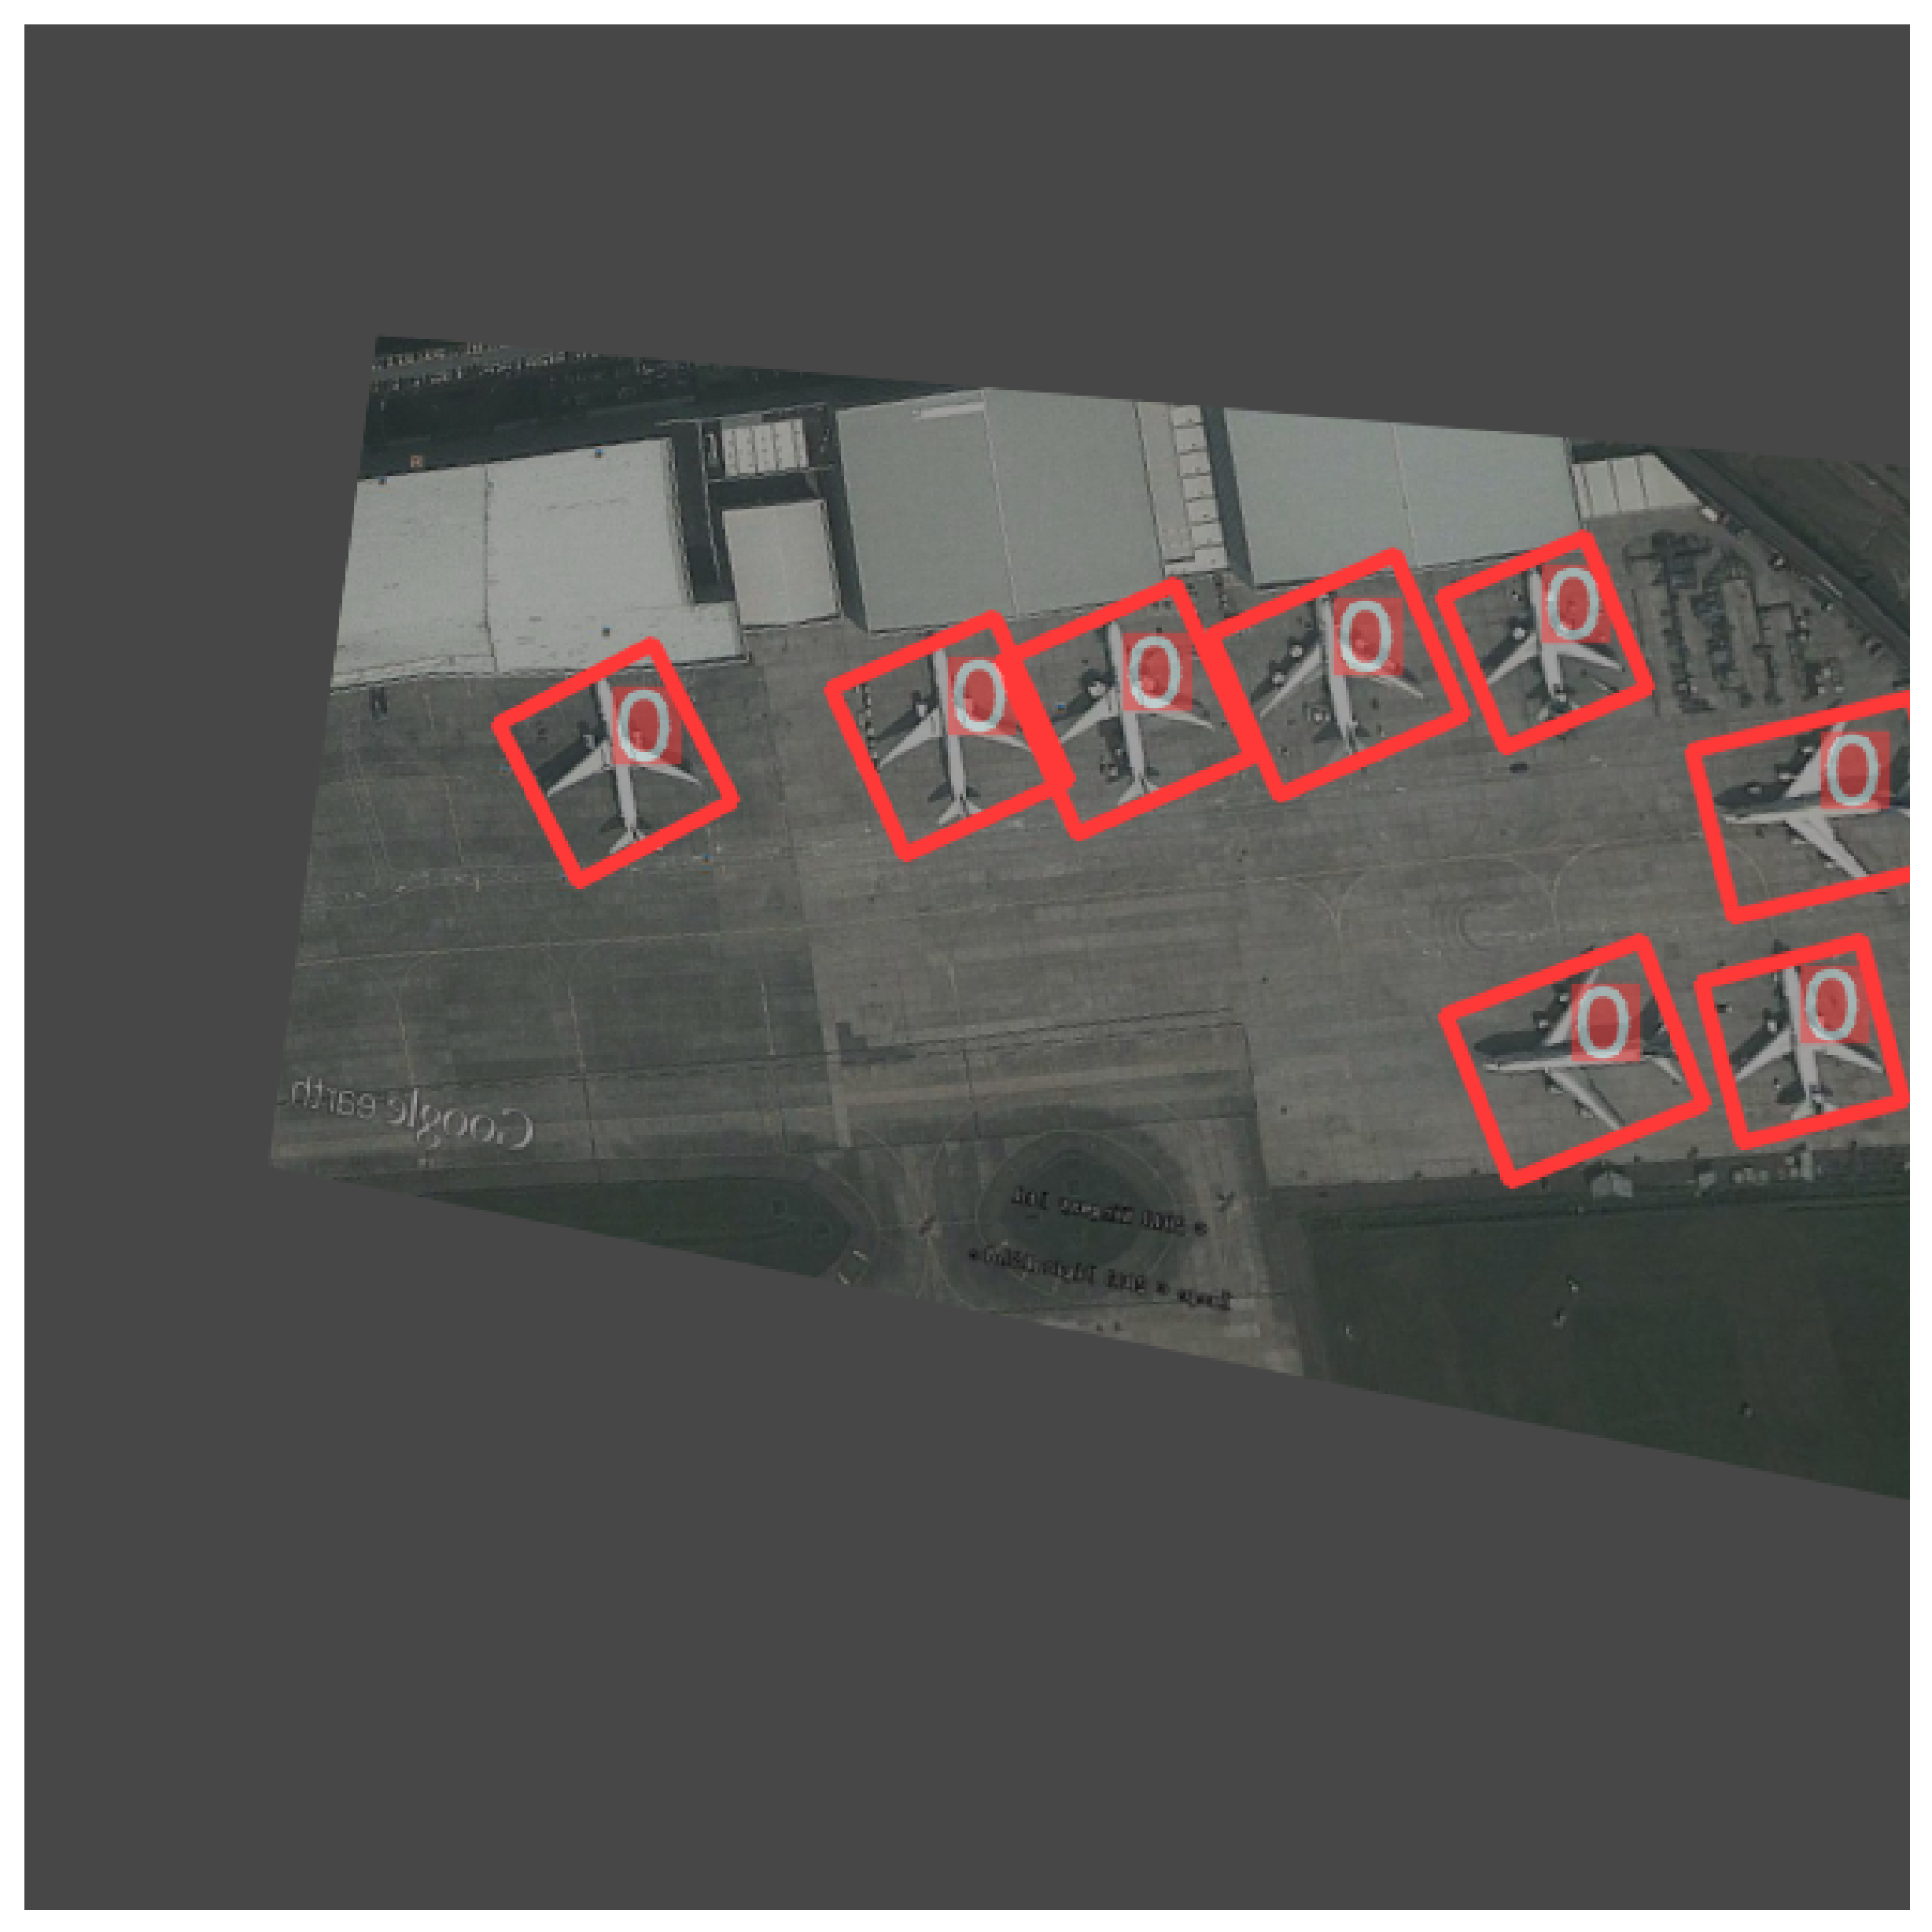

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import yaml
from utils.datasets import create_dataloader
from utils.plots import polygon_plot_images
from utils.general import xywhrm2xyxyxyxy, xyxyxyxy2xywhrm
import torch

%matplotlib inline
    
path = "../UCAS50/images/train"
hyp_dir = "data/hyp.ucas.yaml"
imgsz = 640
batch_size = 1
stride = 32
pad = 0

with open(hyp_dir) as f:
    hyp = yaml.safe_load(f)  # load hyps
# hyp['mixup'] = 1.0    # Modify hyperparameters
# hyp['mosaic'] = 1.0    # Modify hyperparameters
print(hyp)

dataloader, dataset = create_dataloader(path, imgsz, batch_size, int(stride), True,
                                       hyp=hyp, cache=False, rect=False, rank=-1,
                                       world_size=1, augment=True,
                                       pad=pad, workers=0, rotate=True)


imgs, tgts, *_ = next(iter(dataloader))
tgts_xyxyxyxy = torch.zeros((tgts.shape[0], 10), dtype=tgts.dtype, device=tgts.device)
tgts_xyxyxyxy[:, :2] = tgts[:, :2]
tgts_xyxyxyxy[:, 2:] = xywhrm2xyxyxyxy(tgts[:, 2:])

plt.figure(figsize=(24, 16), dpi=200)
plt.imshow(polygon_plot_images(imgs, tgts_xyxyxyxy))
plt.axis('off')

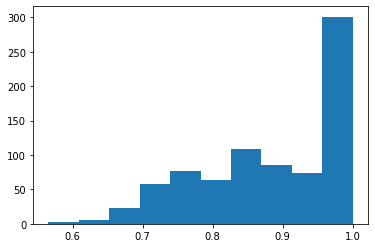

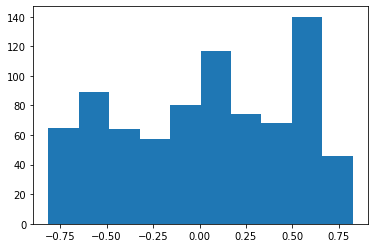

In [5]:
# check the ranges of cosine (real) and sine (imaginary) given rotate-augmentation
cosine = []
sine = []

for _ in range(100):
    _, tgts, *_ = dataset.__getitem__(0)
    cosine.extend(map(lambda x: x.item(), tgts[:, -2]))
    sine.extend(map(lambda x: x.item(), tgts[:, -1]))

plt.hist(cosine)
plt.show()
plt.hist(sine)
plt.show()

In [6]:
# Train rotate-YOLOv5s on UCAS-AOD train (a small subset of original data, contain only 40 images) for 3 epochs
# Link: ()
!python rotate_train.py --weights rotate-yolov5s-ucas.pt --cfg rotate_yolov5s_ucas.yaml \
    --data rotate_ucas.yaml --hyp hyp.ucas.yaml --img-size 1024 \
    --epochs 3 --batch-size 12 --noautoanchor --rotate --cache

YOLOv5 🚀 2021-6-11 torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=12, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/rotate_yolov5s_ucas.yaml', data='./data/rotate_ucas.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='./data/hyp.ucas.yaml', image_weights=False, img_size=[1024, 1024], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=True, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, rotate=True, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=12, upload_dataset=False, weights='rotate-yolov5s-ucas.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, wa

Optimizer stripped from runs/train/exp/weights/rotate_last.pt, 14.5MB
Optimizer stripped from runs/train/exp/weights/rotate_best.pt, 14.5MB
Images sizes do not match. This will causes images to be display incorrectly in the UI.

wandb: Waiting for W&B process to finish, PID 11675
wandb: Program ended successfully.
wandb:                                                                                
wandb: Find user logs for this run at: /home/xinzeli831/PolygonObjectDetection/new/rotate-yolov5/wandb/run-20210817_083404-2oletl8d/logs/debug.log
wandb: Find internal logs for this run at: /home/xinzeli831/PolygonObjectDetection/new/rotate-yolov5/wandb/run-20210817_083404-2oletl8d/logs/debug-internal.log
wandb: Run summary:
wandb:         train/box_loss 0.09213
wandb:         train/obj_loss 0.07091
wandb:         train/cls_loss 0.00022
wandb:      metrics/precision 0.80783
wandb:         metrics/recall 0.82398
wandb:        metrics/mAP_0.5 0.71969
wandb:   metrics/mAP_0.5:0.95 0.34949
wand

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see labels, predictions and augmentation effects. If want to use mosaic effects in **DataLoader**, please modify data/hyp.ucas.yaml or related files

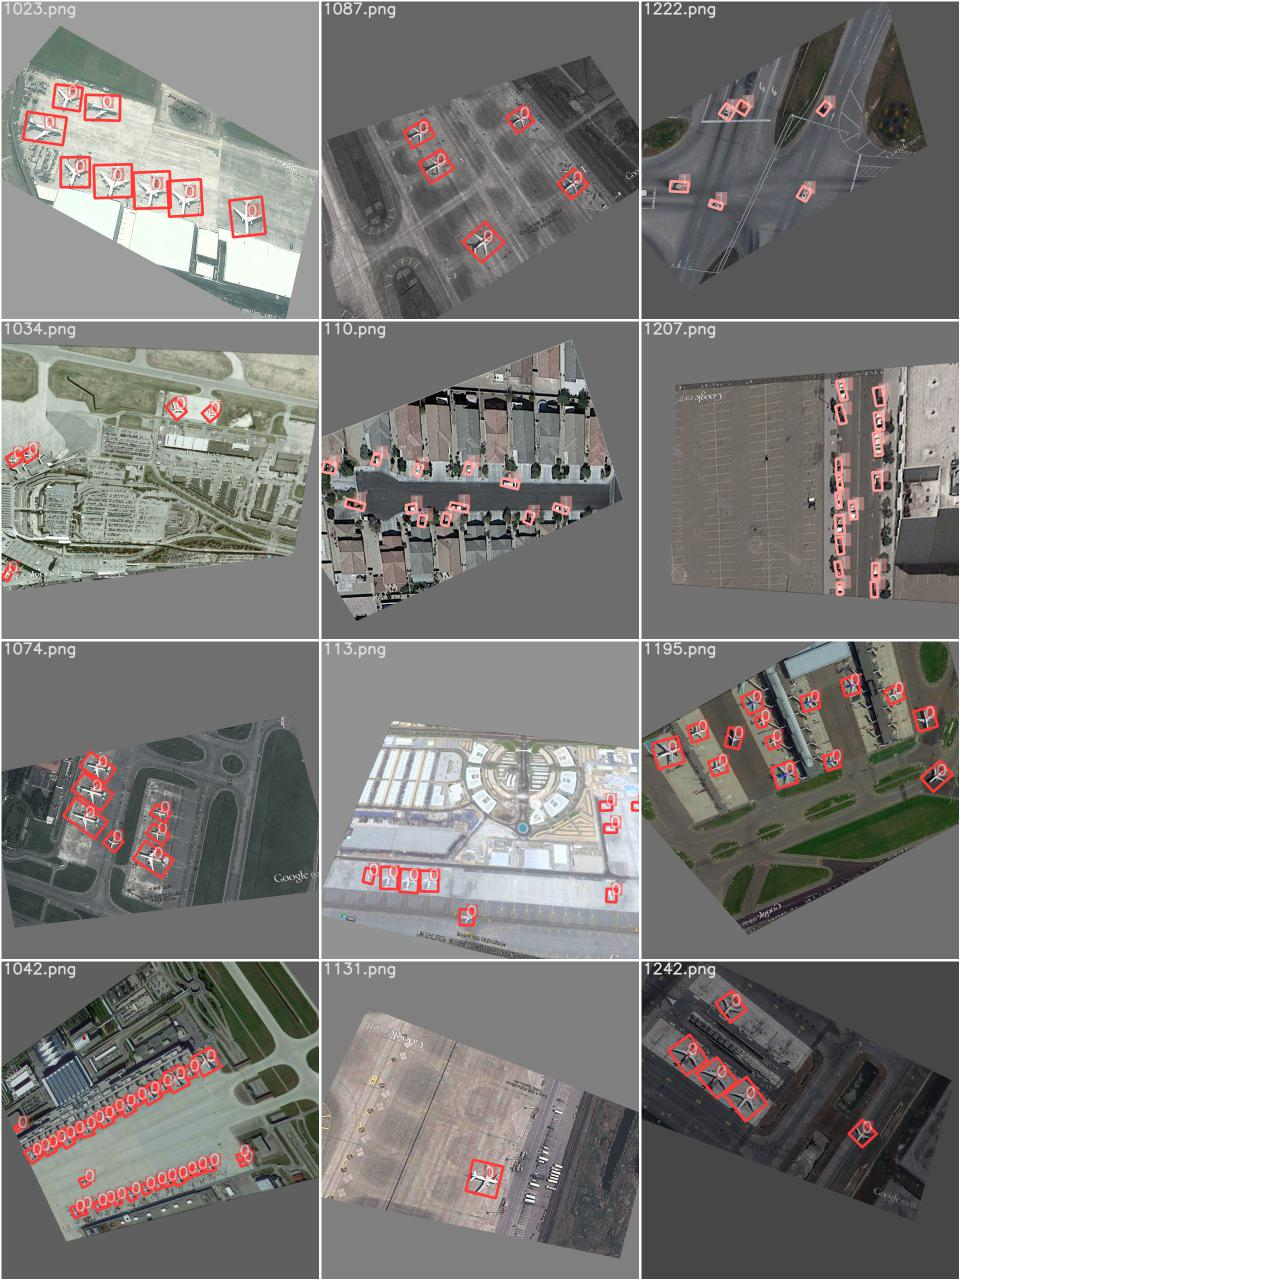

In [7]:
from IPython.display import Image

Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 labels
# Image(filename='runs/train/exp/train_batch1.jpg', width=800)  # train batch 1 labels
# Image(filename='runs/train/exp/train_batch2.jpg', width=800)  # train batch 2 labels

Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes.

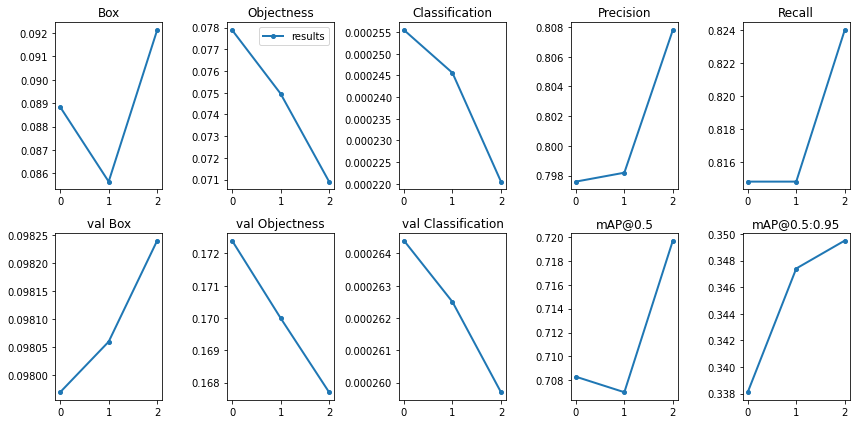

In [8]:
from IPython.display import Image, display

from utils.plots import plot_results
# notest=True in training, so val losses are not available in the following figures
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png

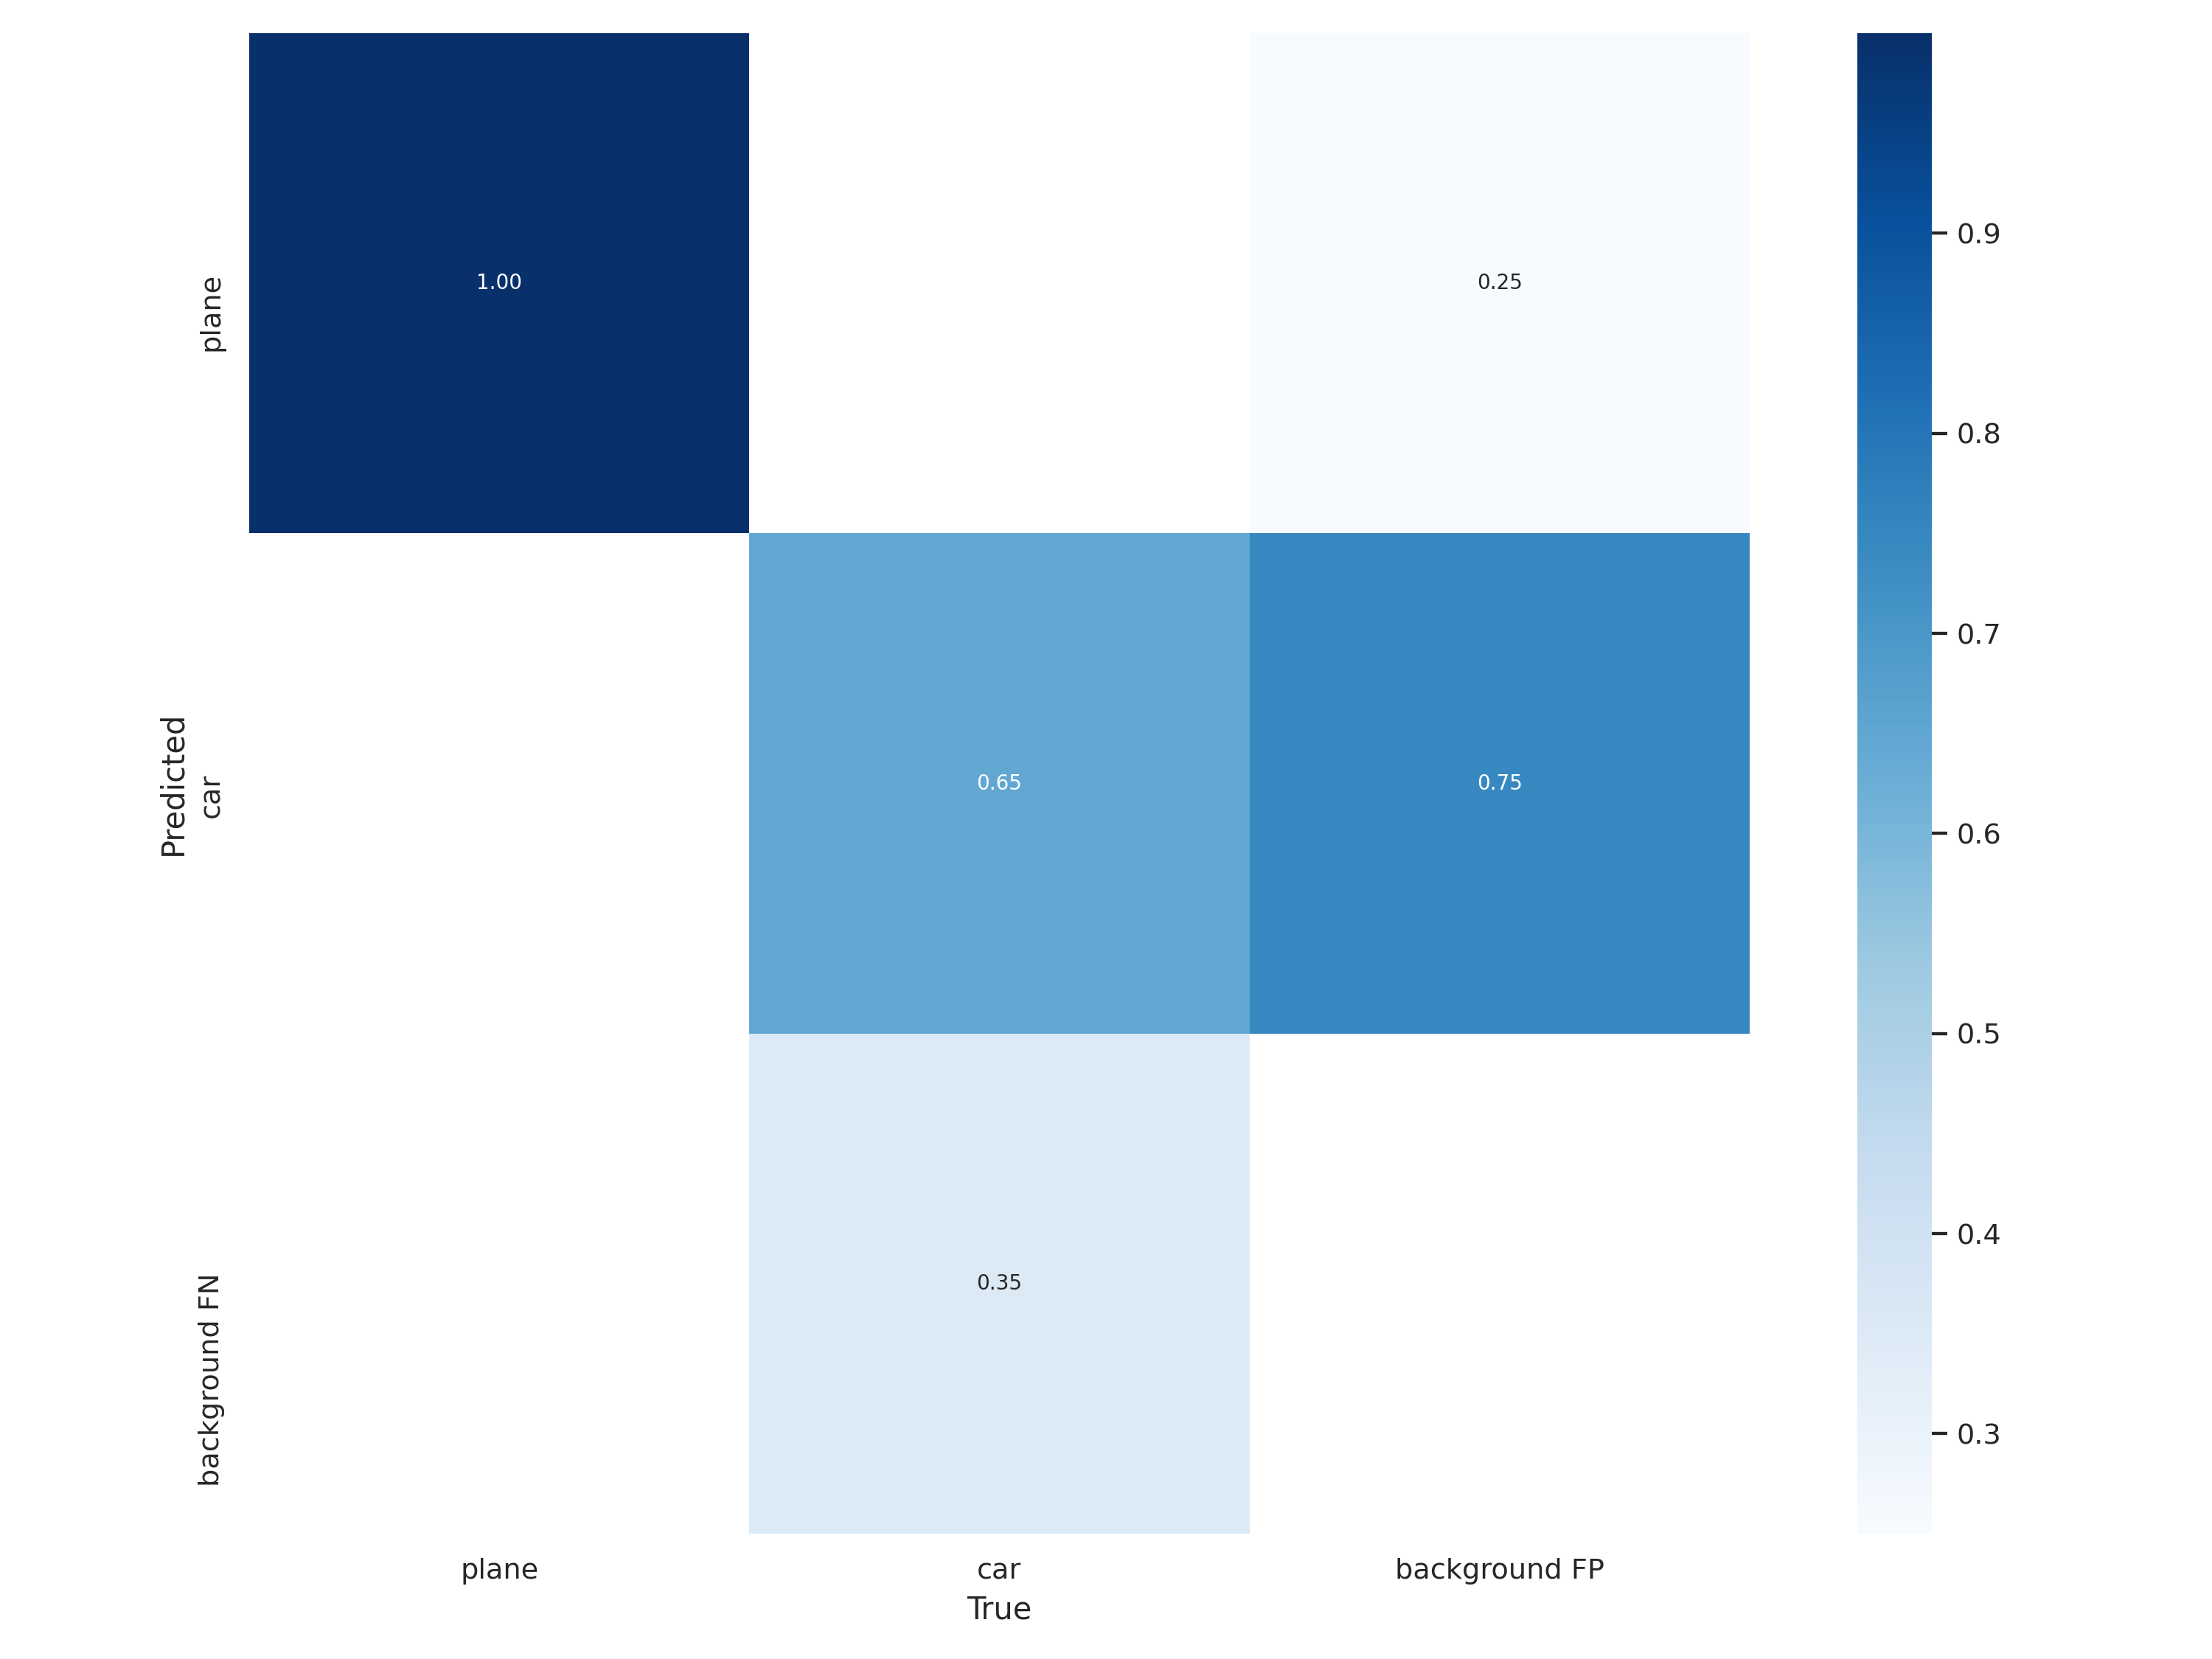

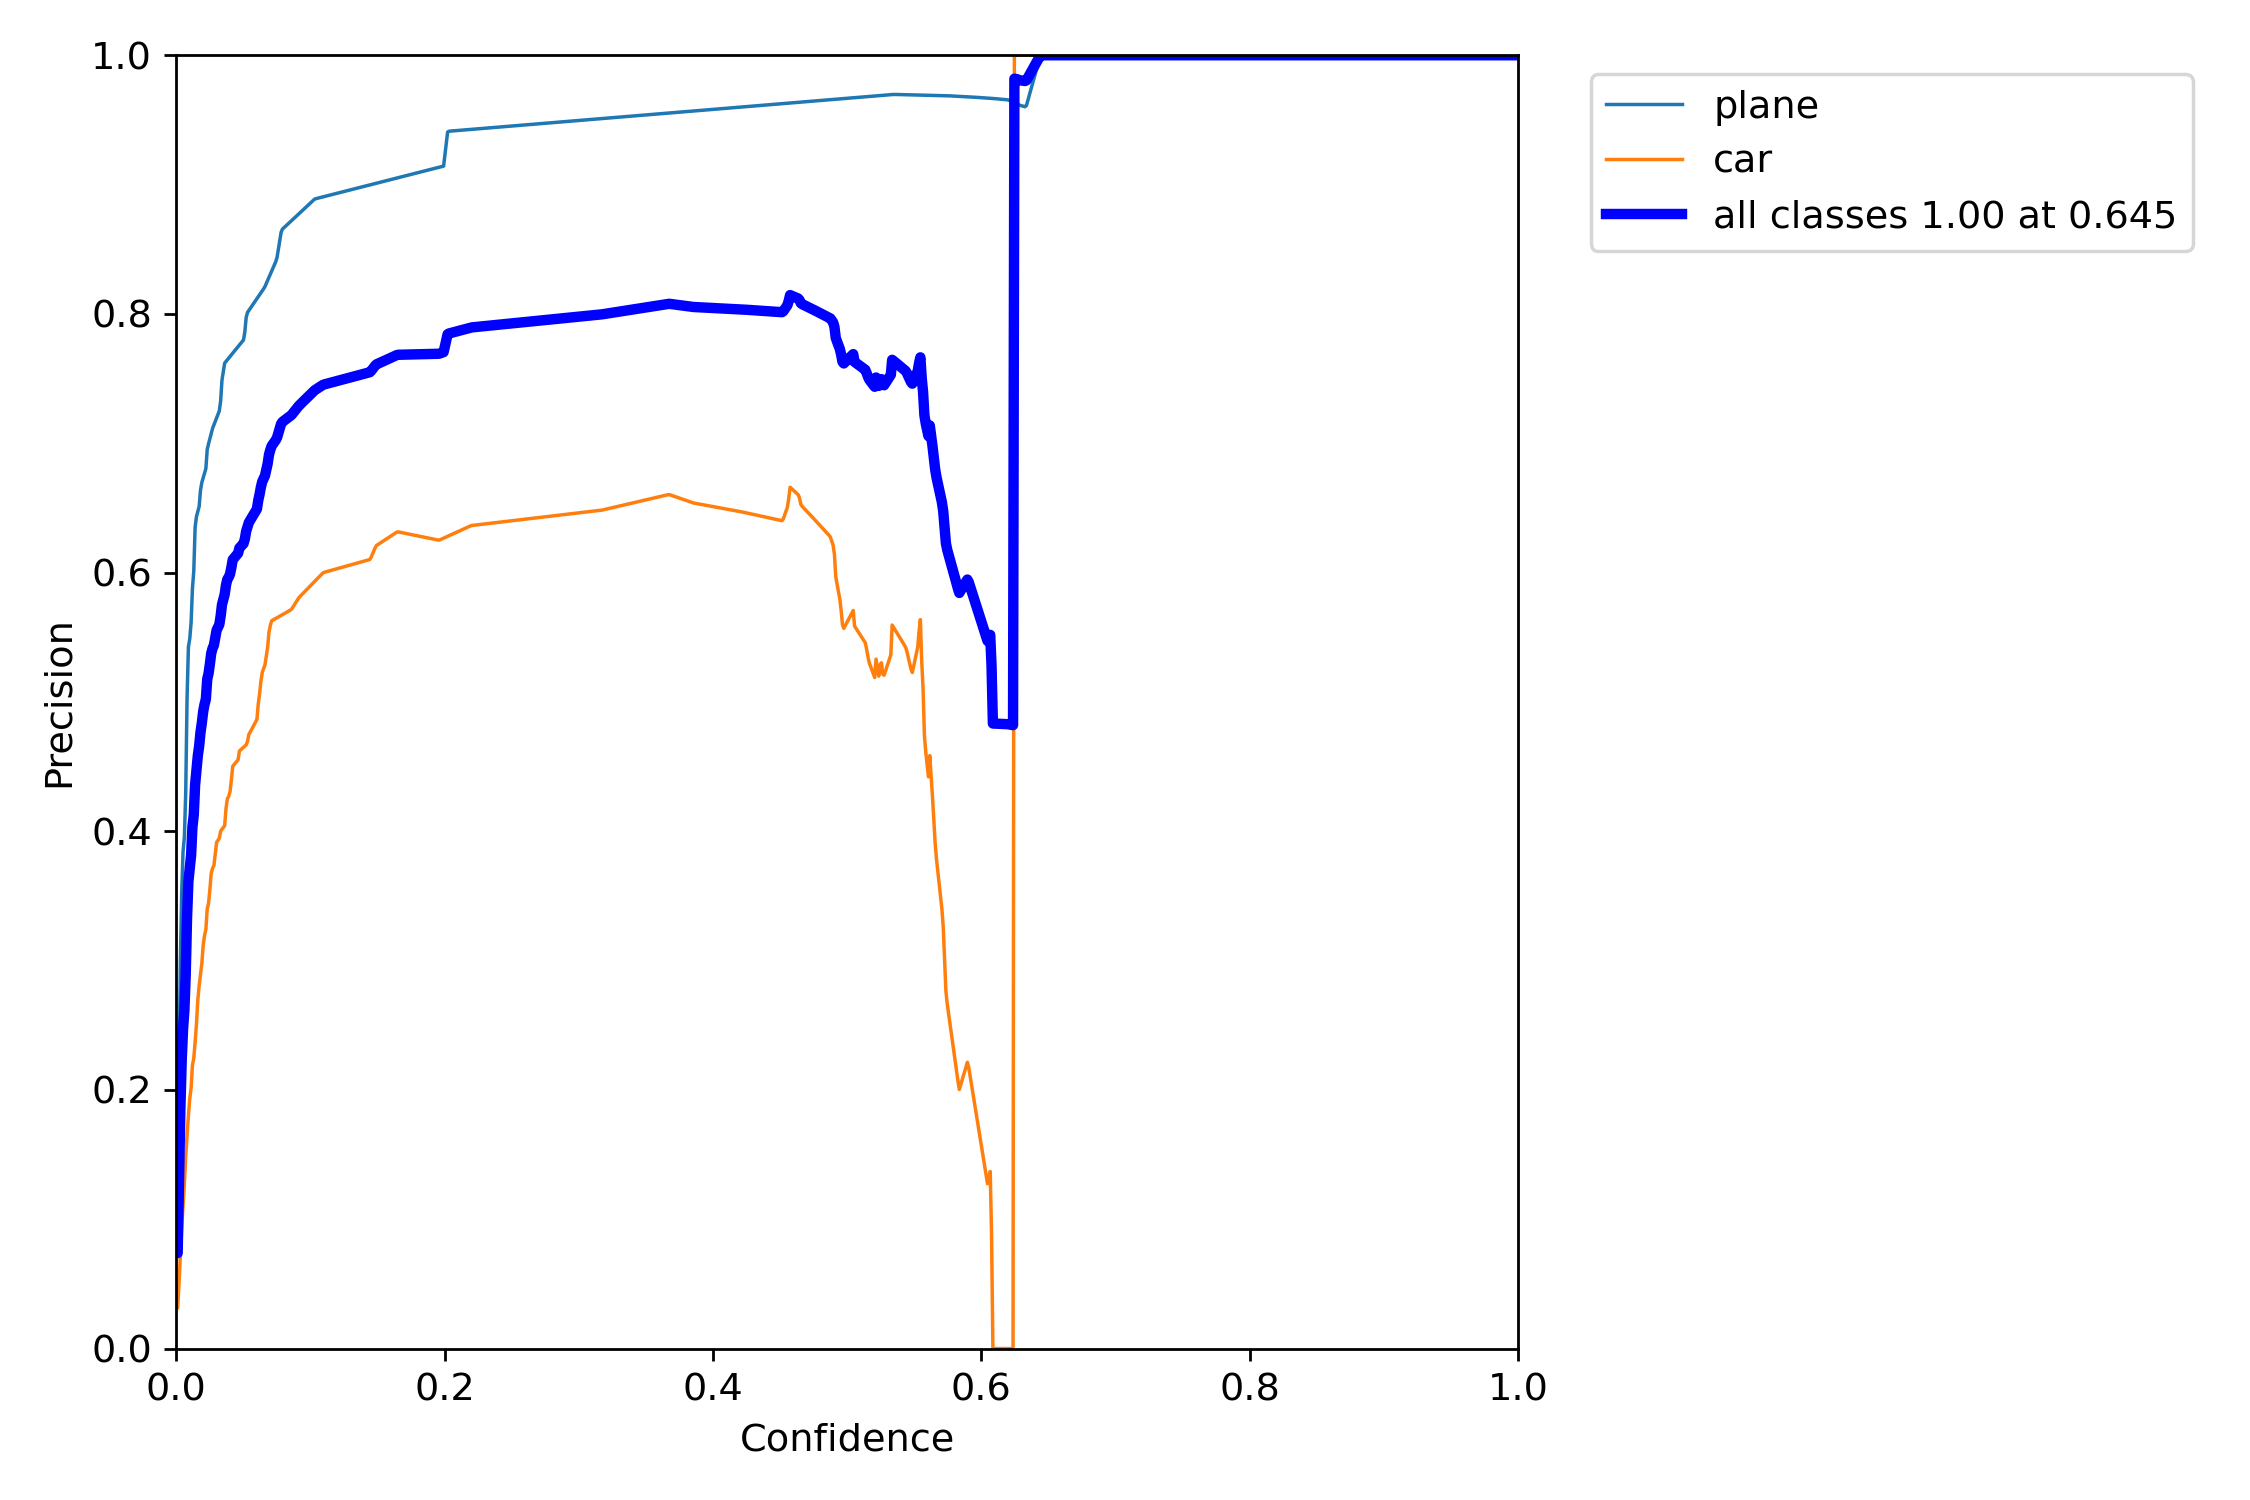

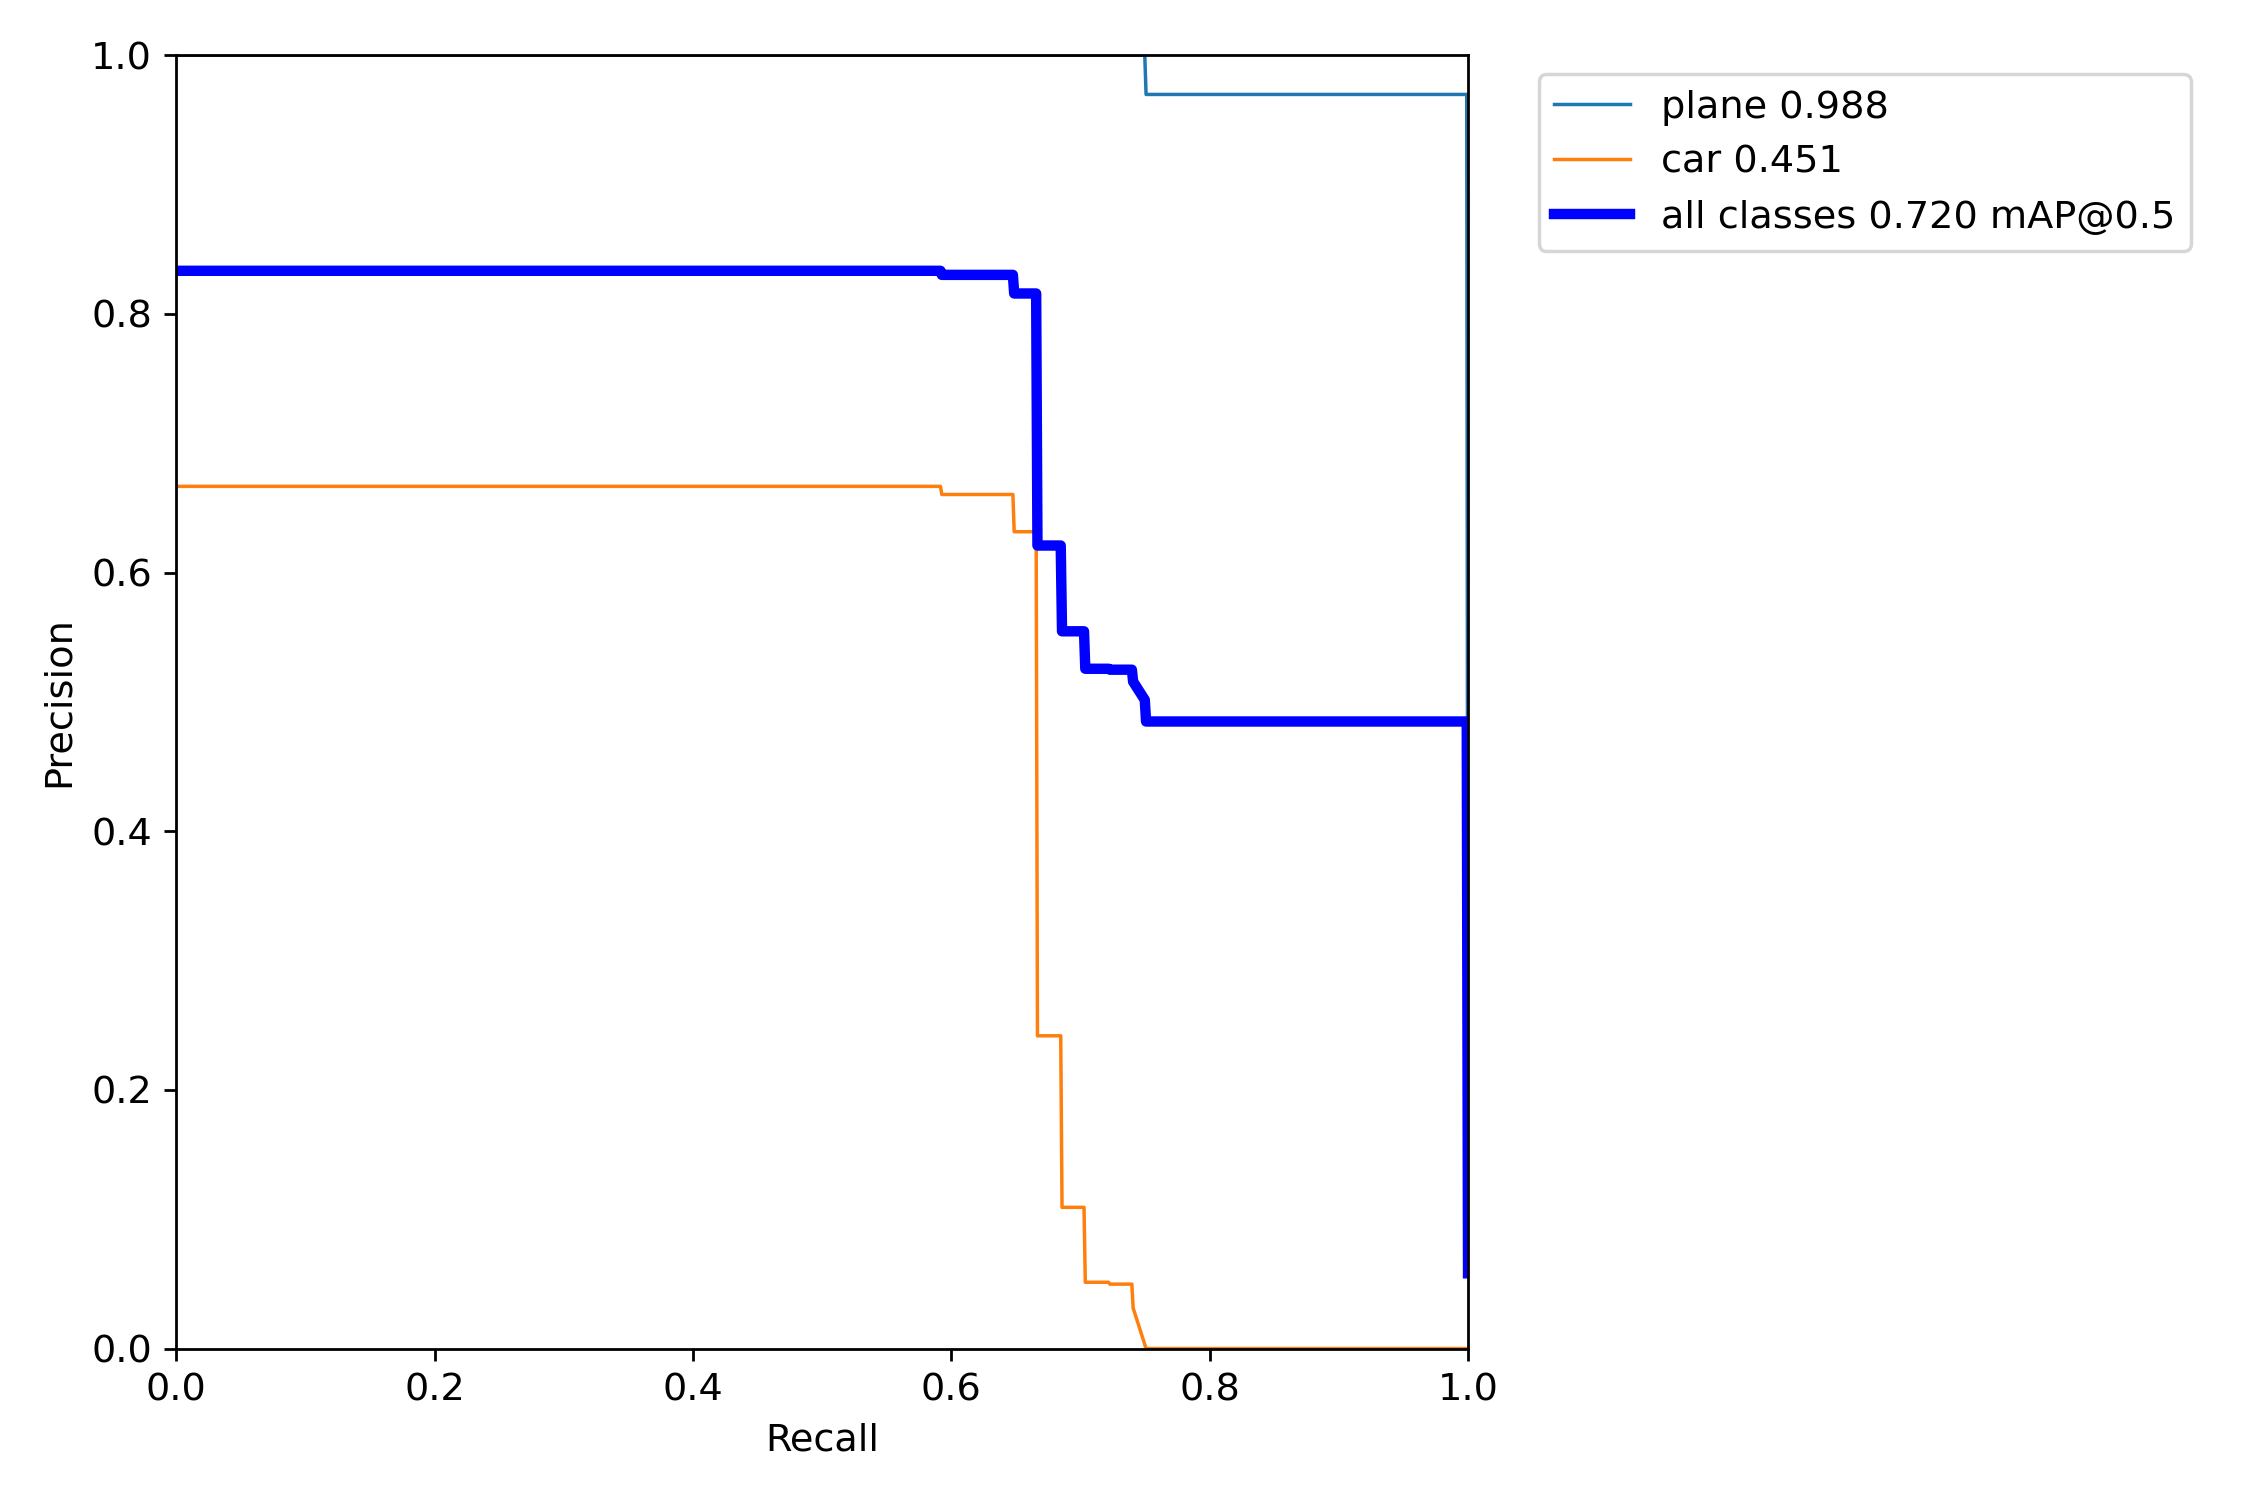

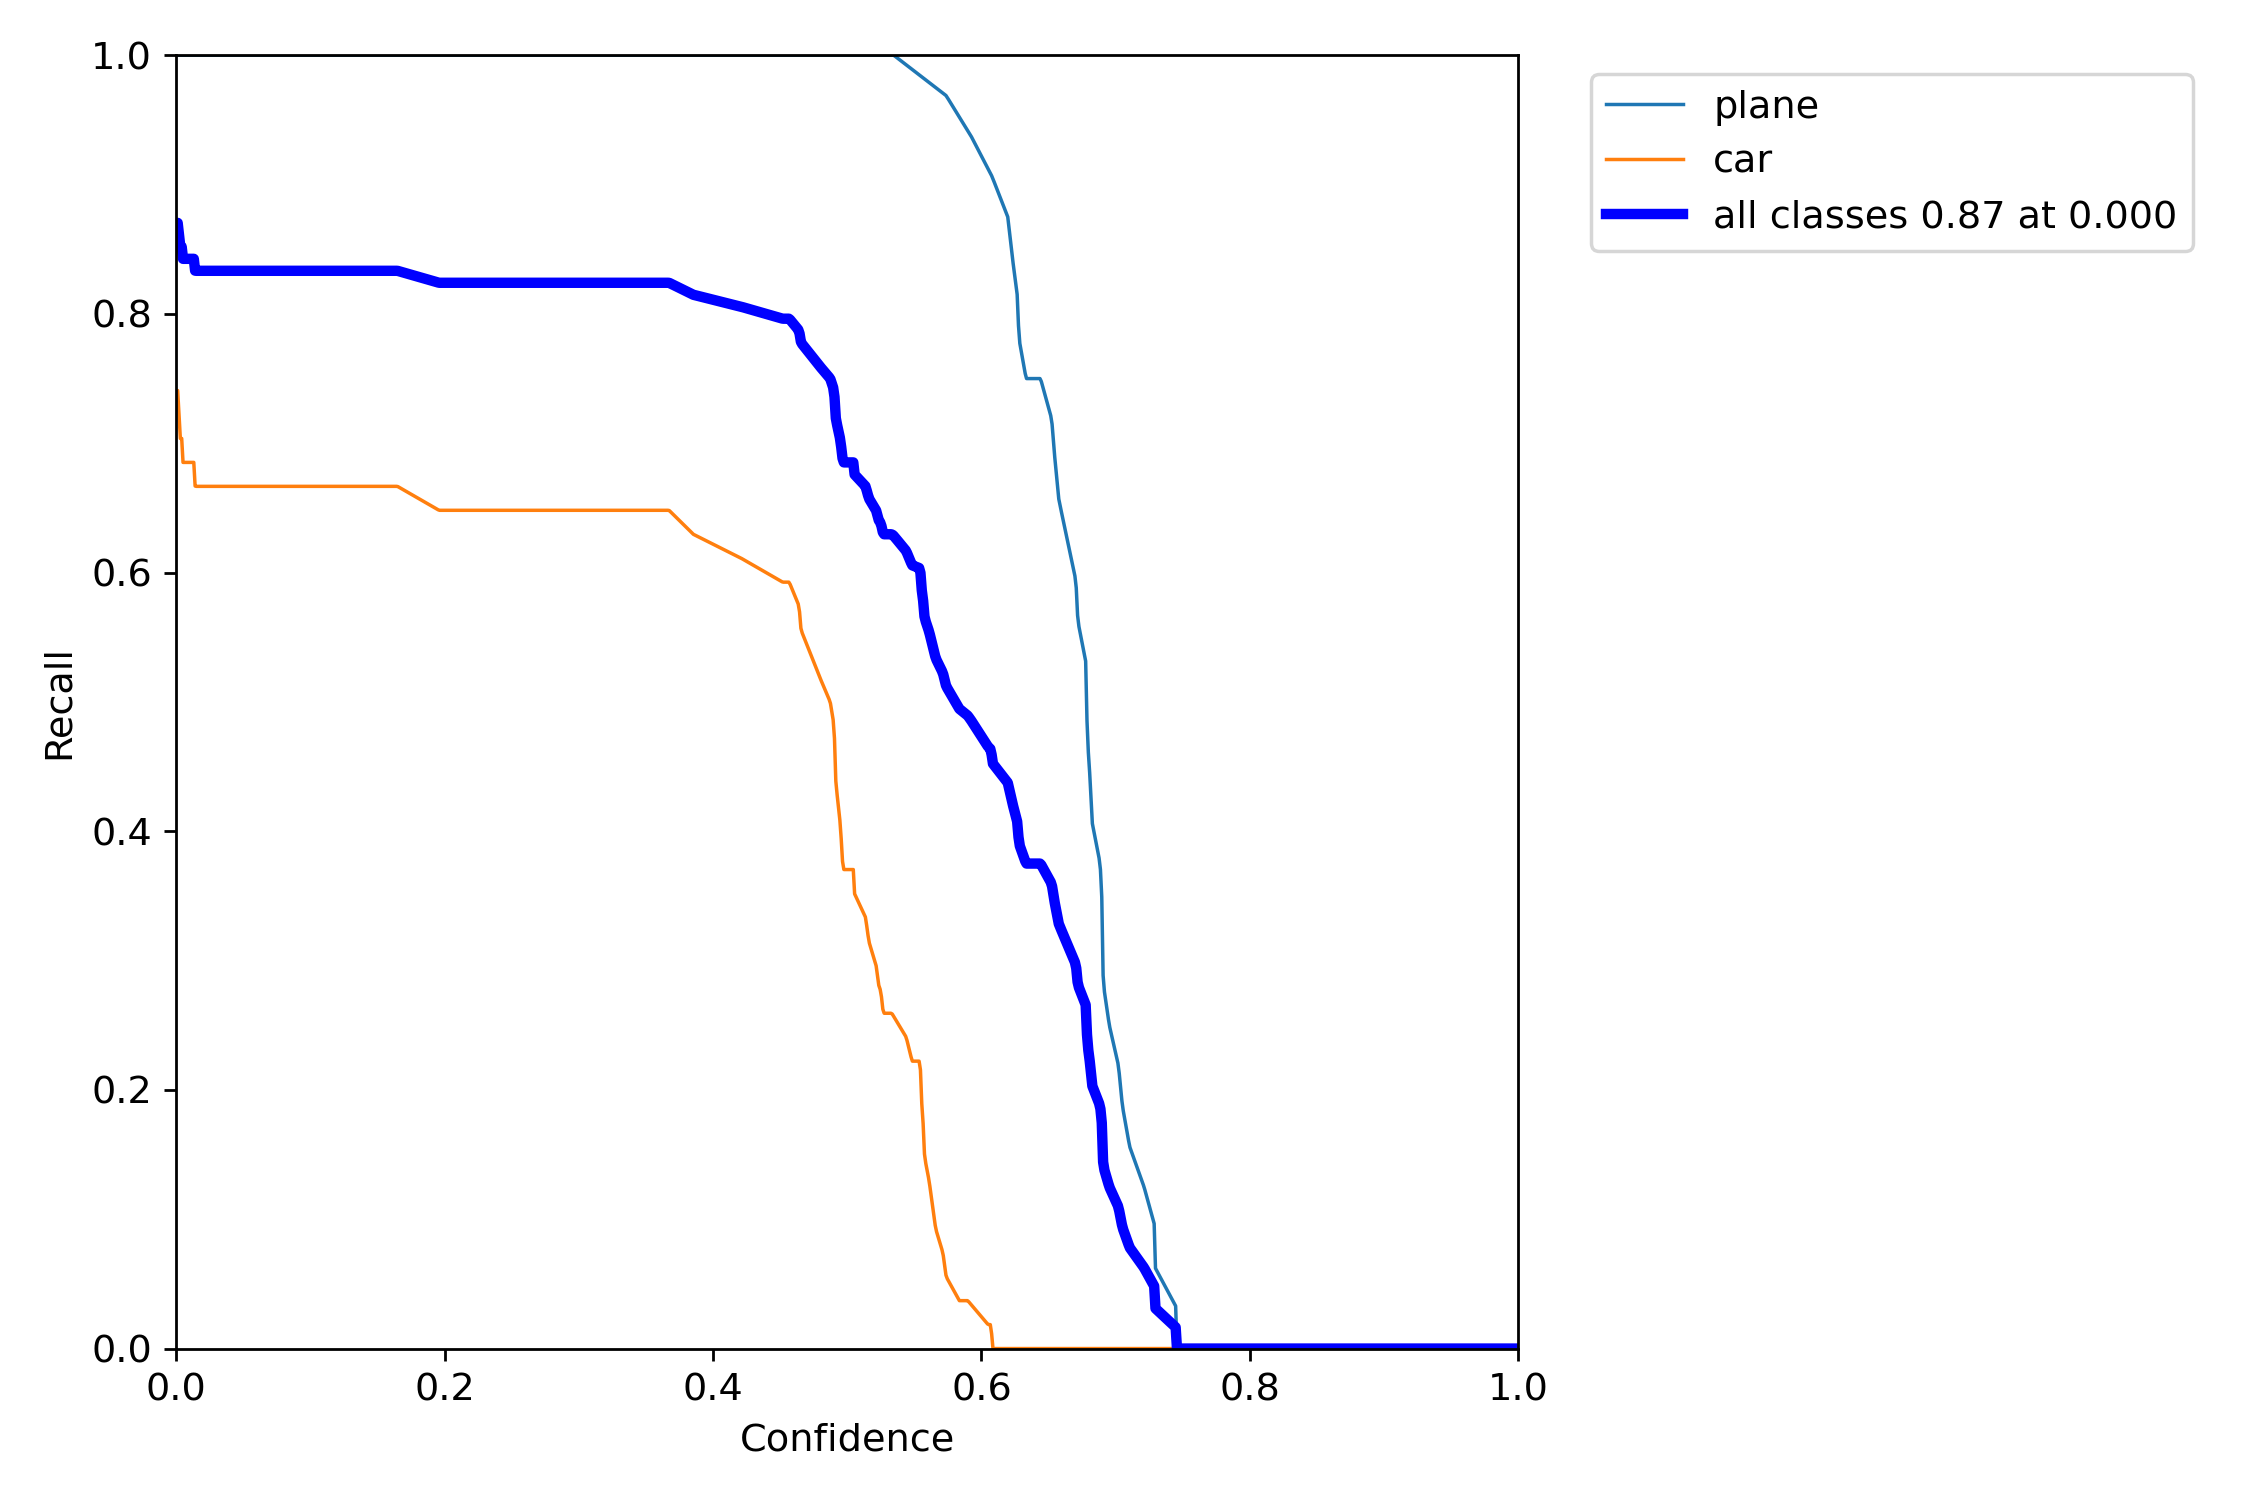

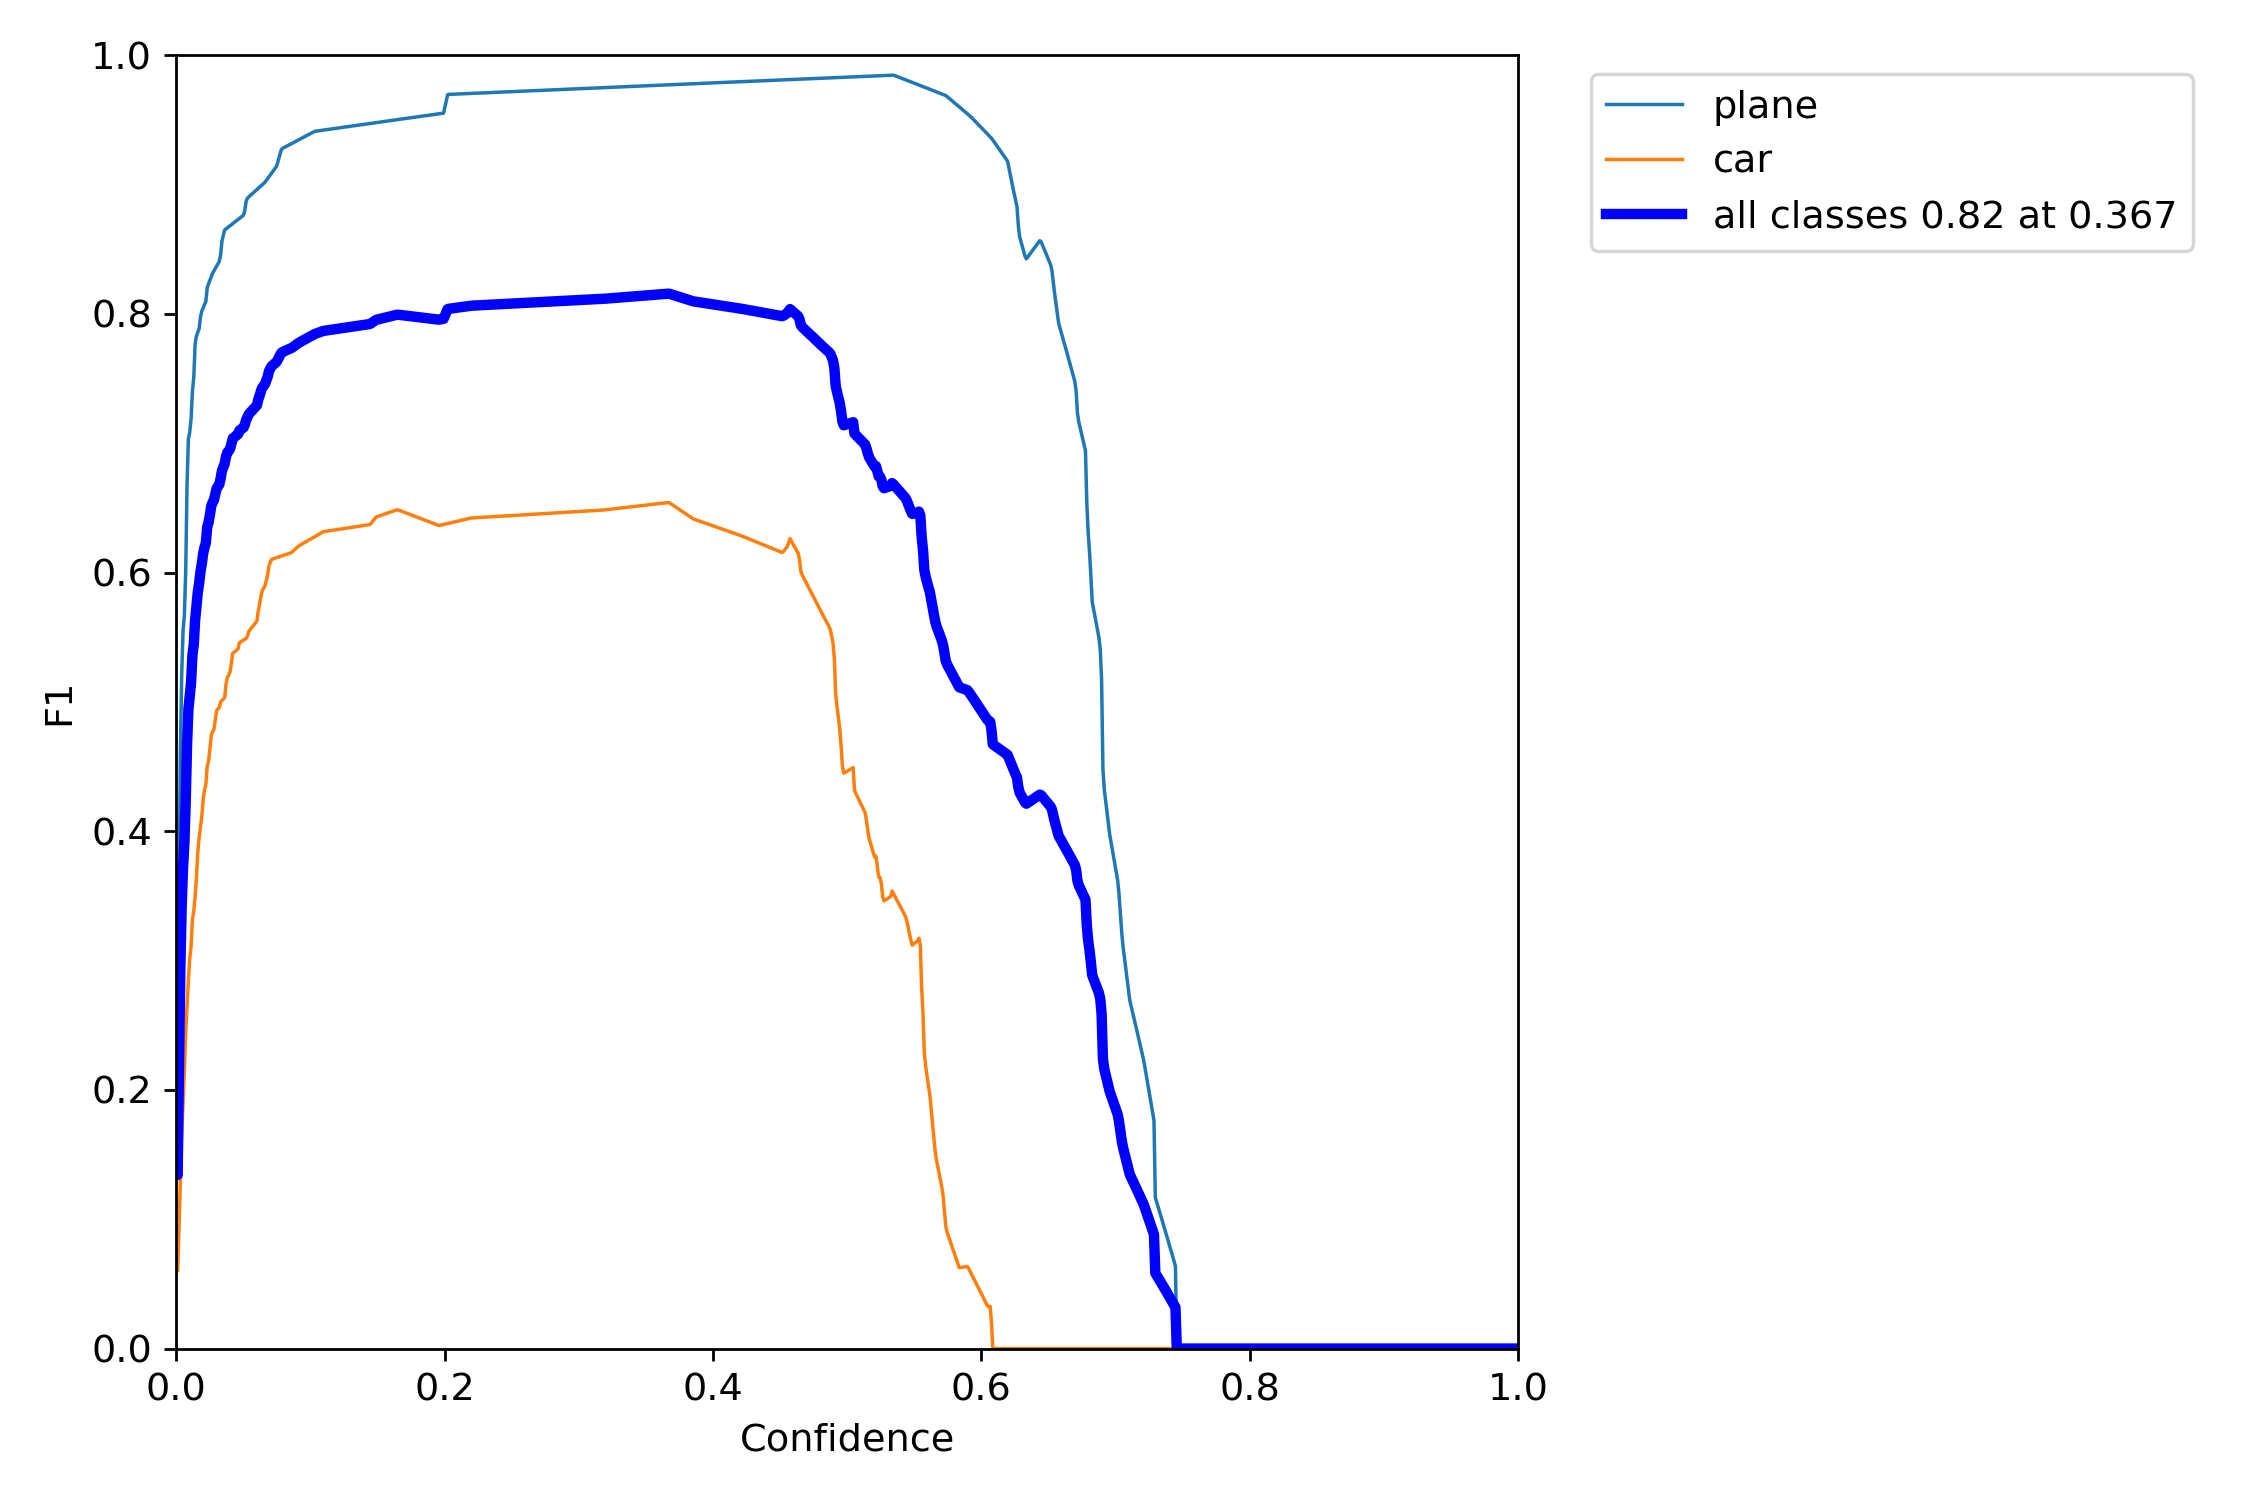

In [9]:
from pathlib import Path
from IPython.display import Image, display

result_dir = Path('runs/train/exp')

files = ['confusion_matrix.png', 'P_curve.png', 'PR_curve.png', 'R_curve.png', 'F1_curve.png']

for file in files:
    display(Image(filename=str(result_dir/file), width=800))